<a href="https://colab.research.google.com/github/LevanshBhan/Pune_House_Price_Prediction/blob/main/Pune_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pune Housing Price Prediction


# Dataset-https://www.kaggle.com/datasets/levanshbhan/pune-house-data

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
#Reading the data

housing = pd.read_csv("Pune_House_Data.csv")
housing.head()

area_type   availability         location       size  society  \
0  Super built-up  Area         19-Dec      Alandi Road      2 BHK   Coomee   
1            Plot  Area  Ready To Move  Ambegaon Budruk  4 Bedroom  Theanmp   
2        Built-up  Area  Ready To Move       Anandnagar      3 BHK      NaN   
3  Super built-up  Area  Ready To Move            Aundh      3 BHK  Soiewre   
4  Super built-up  Area  Ready To Move       Aundh Road      2 BHK      NaN   

  total_sqft  bath  balcony   price  
0       1056   2.0      1.0   39.07  
1       2600   5.0      3.0  120.00  
2       1440   2.0      3.0   62.00  
3       1521   3.0      1.0   95.00  
4       1200   2.0      1.0   51.00

In [4]:
#Checking the features in the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


##### There are 13320 samples and 9 features. There are few features with missing values.

#### Univariate Analysis

<Axes: xlabel='area_type', ylabel='count'>

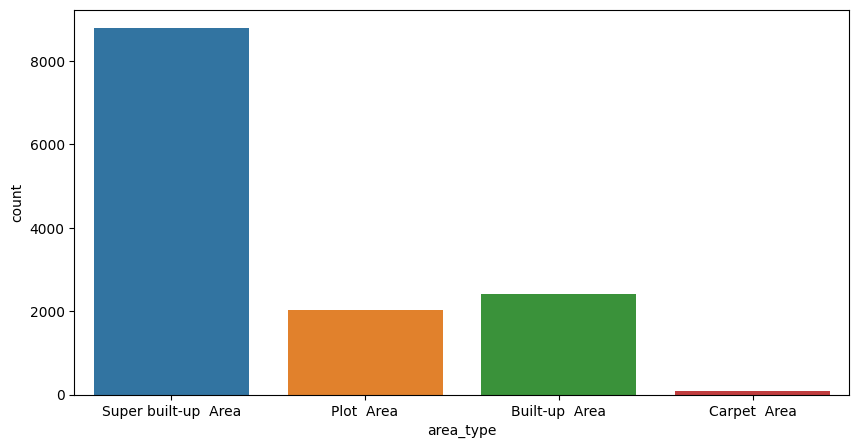

In [5]:
sns.countplot(x="area_type", data = housing)

In [6]:
housing["availability"].value_counts()

Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
21-May    

##### The feature can be labelled as "Ready to Move" or "To be Vacated"

In [7]:
housing["location"].value_counts()

Alandi Road                   139
Kalyani Nagar                 139
Mahatma Gandhi Road           139
Lulla Nagar                   139
Laxmi Road                    139
Law College Road              139
Ambegaon Budruk               139
Koregaon Park                 139
Kondhwa Khurd                 139
Kondhwa Budruk                139
Kondhwa                       139
Kharadi                       139
Khadki                        139
Khadaki                       139
Katraj                        139
Kasba Peth                    139
Karve Road                    139
Mangalwar peth                139
Manik Bagh                    139
Market yard                   139
Padmavati                     139
Pune Railway Station          139
Prabhat Road                  139
Pirangut                      139
Paud Road                     139
Pashan                        139
Parvati Darshan               139
Navi Peth                     139
Model colony                  139
Narayangaon   

##### We can drop "location" feature 

In [8]:
housing["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

##### We can relabel them to have only numberical data

In [ ]:
housing["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Shard T     1
Vitat H     1
NadriNe     1
ThntsAp     1
MBpleca     1
Name: society, Length: 2688, dtype: int64

##### We can drop "society" feature 

In [9]:
housing["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

<ipython-input-10-7a5bf56747ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing["bath"], hist=True, kde=False,


<Axes: xlabel='bath'>

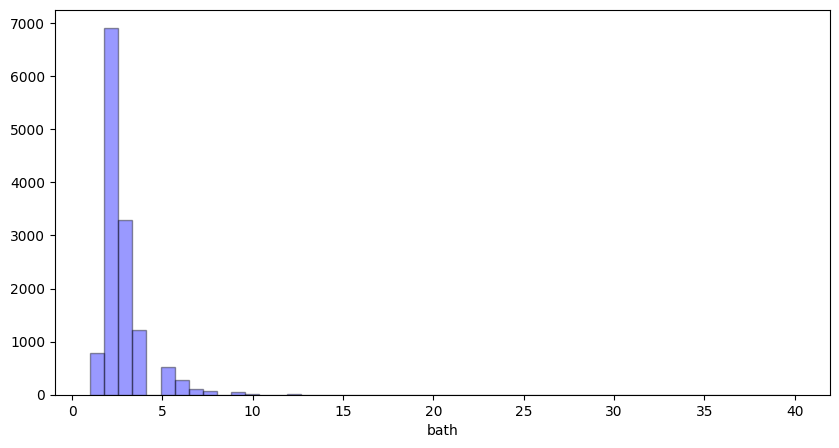

In [10]:
sns.distplot(housing["bath"], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [11]:
housing["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

<ipython-input-12-98f819f1e447>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing["price"], hist=True, kde=False,


<Axes: xlabel='price'>

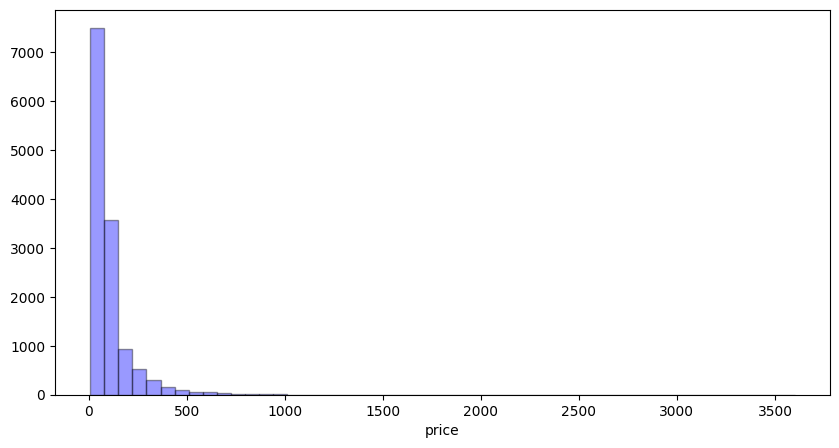

In [12]:
sns.distplot(housing["price"], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

#### Handling Missing Values

In [13]:
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
housing_clean = housing.copy()

In [15]:
housing_clean[pd.isnull(housing_clean["size"])]

area_type          availability                location size  society  \
579    Plot  Area  Immediate Possession                   Aundh  NaN  Asiss B   
1775   Plot  Area  Immediate Possession           Kondhwa Khurd  NaN  Orana N   
2264   Plot  Area  Immediate Possession             Market yard  NaN      NaN   
2809   Plot  Area  Immediate Possession  Fergusson College Road  NaN  AsdiaAr   
2862   Plot  Area  Immediate Possession             Satara Road  NaN  Ajleyor   
5333   Plot  Area  Immediate Possession     Mahatma Gandhi Road  NaN  Emngs S   
6423   Plot  Area  Immediate Possession           Uruli Devachi  NaN  SRniaGa   
6636   Plot  Area  Immediate Possession                  Bopodi  NaN  S2enste   
6719   Plot  Area  Immediate Possession                   Warje  NaN   SJowsn   
7680   Plot  Area  Immediate Possession                Yerawada  NaN      NaN   
8306   Plot  Area  Immediate Possession        Law College Road  NaN  Vaensnd   
8565   Plot  Area  Immediate Possession           Dhayari Phata  NaN   Ocezes   
8703   Plot  Area  Immediate Possession             Narayangaon  NaN   Naoden   
10634  Plot  Area  Immediate Possession           Sadashiv Peth  NaN      NaN   
11019  Plot  Area  Immediate Possession           Sahakar Nagar  NaN  Saaveha   
11569  Plot  Area  Immediate Possession                 Kothrud  NaN  AVeldun   

        total_sqft  bath  balcony    price  
579    1200 - 2400   NaN      NaN   34.185  
1775   2000 - 5634   NaN      NaN  124.000  
2264          2400   NaN      NaN  460.000  
2809   1200 - 2400   NaN      NaN   28.785  
2862   1500 - 2400   NaN      NaN   46.800  
5333   2100 - 5405   NaN      NaN  177.115  
6423          2324   NaN      NaN   26.730  
6636          1500   NaN      NaN   25.490  
6719    800 - 2660   NaN      NaN   28.545  
7680          5000   NaN      NaN  400.000  
8306          1453   NaN      NaN   16.500  
8565          2000   NaN      NaN  120.000  
8703   1200 - 2400   NaN      NaN   42.300  
10634         1575   NaN      NaN   31.110  
11019  1200 - 1800   NaN      NaN   12.750  
11569         1350   NaN      NaN    8.440

In [16]:
# Dropping samples with 3 or more missing records
housing_clean.dropna(axis=0, thresh = 7, inplace = True)

In [17]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [18]:
housing_clean[pd.isnull(housing_clean["location"])]

area_type   availability location   size  society total_sqft  \
1728  Super built-up  Area  Ready To Move      NaN  2 BHK  NaaveEn        920   

      bath  balcony  price  
1728   2.0      0.0   35.0

In [19]:
housing_clean[housing_clean["society"] == "Grare S"]

area_type   availability        location   size  society  \
568    Super built-up  Area  Ready To Move   Wadgaon Sheri  3 BHK  Grare S   
12238          Carpet  Area  Ready To Move  Kondhwa Budruk  3 BHK  Grare S   

      total_sqft  bath  balcony  price  
568         1600   3.0      2.0   86.0  
12238       1600   3.0      2.0   77.0

In [20]:
housing_clean["location"] =  housing_clean["location"].replace(to_replace = np.nan, value = "Anantapura")

In [21]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [22]:
housing_clean["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
#Adding the "bhk" feature extracted from size

housing_clean["bhk"] = housing_clean["size"].apply(lambda x: int(x.split(" ")[0]))

In [24]:
housing_clean[pd.isnull(housing_clean["bath"])]

area_type   availability                    location  \
56           Built-up  Area         20-Feb                Model colony   
81           Built-up  Area         18-Oct              Shukrawar Peth   
224    Super built-up  Area         19-Dec                    Hadapsar   
344    Super built-up  Area         21-Dec                Model colony   
669    Super built-up  Area         18-Dec                    Wanowrie   
702    Super built-up  Area         18-Dec                    Gultekdi   
801    Super built-up  Area         18-Dec  Hadapsar Industrial Estate   
941    Super built-up  Area  Ready To Move                 Satara Road   
1264         Built-up  Area         18-May                      Dapodi   
1267   Super built-up  Area         18-Jun                  Dhankawadi   
1686   Super built-up  Area         21-Dec                  Manik Bagh   
1724   Super built-up  Area  Ready To Move                  Wakadewadi   
1765   Super built-up  Area         19-Dec               Kalyani Nagar   
1852   Super built-up  Area         19-Jun               Ghorpade Peth   
2500   Super built-up  Area         22-May                       Aundh   
2563   Super built-up  Area  Ready To Move                      Pashan   
2944   Super built-up  Area         18-Dec                   Navi Peth   
2998   Super built-up  Area         19-May            Dhole Patil Road   
3370   Super built-up  Area  Ready To Move                Bhavani Peth   
3544   Super built-up  Area         19-Mar              Vadgaon Budruk   
3598   Super built-up  Area         18-Jun              Kondhwa Budruk   
3862   Super built-up  Area  Ready To Move            Dhole Patil Road   
4210   Super built-up  Area  Ready To Move              Shukrawar Peth   
4346   Super built-up  Area         18-Dec                 Ganesh Peth   
4843   Super built-up  Area         18-Mar                      Khadki   
4894   Super built-up  Area  Ready To Move                    Wanowrie   
4995   Super built-up  Area         18-Mar                  Anandnagar   
5464   Super built-up  Area         18-Sep              Vadgaon Budruk   
5498         Built-up  Area  Ready To Move                 Ganesh Peth   
5747   Super built-up  Area         18-Apr               Sinhagad Road   
5918   Super built-up  Area  Ready To Move                Narayan Peth   
6256         Built-up  Area  Ready To Move               Chandan Nagar   
6343   Super built-up  Area         18-May                       Baner   
6481   Super built-up  Area         18-Jun                     Kothrud   
6778   Super built-up  Area  Ready To Move                Mukund Nagar   
6873   Super built-up  Area         18-Mar                Model colony   
6971   Super built-up  Area         18-Dec                    Mundhawa   
7398   Super built-up  Area         18-Dec                Balaji Nagar   
7623   Super built-up  Area  Ready To Move                  Karve Road   
7921   Super built-up  Area         18-Mar                     Kothrud   
8020   Super built-up  Area         22-May                 Lulla Nagar   
8056   Super built-up  Area  Ready To Move              Vadgaon Budruk   
8275   Super built-up  Area         21-Dec                   Dehu Road   
8289   Super built-up  Area         18-Apr                    Hadapsar   
8472   Super built-up  Area         18-Dec                Fatima Nagar   
8783   Super built-up  Area         18-Dec               Kondhwa Khurd   
9129   Super built-up  Area         18-May             Bhandarkar Road   
9437         Built-up  Area         18-May                    Ghorpadi   
9699   Super built-up  Area         18-Jul                  Anandnagar   
10330  Super built-up  Area  Ready To Move                Mukund Nagar   
10553        Built-up  Area  Ready To Move               Wadgaon Sheri   
10726  Super built-up  Area         18-Mar                Prabhat Road   
11297  Super built-up  Area         18-Dec                   Padmavati   
11496  Super built-up 

In [25]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

housing_clean[~housing_clean["total_sqft"].apply(fcnIsFloat)]

area_type   availability                    location  \
30     Super built-up  Area         19-Dec                    Gultekdi   
56           Built-up  Area         20-Feb                Model colony   
81           Built-up  Area         18-Oct              Shukrawar Peth   
122    Super built-up  Area         18-Mar                 Ganeshkhind   
137    Super built-up  Area         19-Mar                     Khadaki   
165    Super built-up  Area         18-Dec                Prabhat Road   
188    Super built-up  Area  Ready To Move                  Wakadewadi   
224    Super built-up  Area         19-Dec                    Hadapsar   
410    Super built-up  Area  Ready To Move                 Ganeshkhind   
549    Super built-up  Area         18-Sep                Prabhat Road   
648          Built-up  Area  Ready To Move                Raviwar Peth   
661    Super built-up  Area  Ready To Move                  Tilak Road   
669    Super built-up  Area         18-Dec                    Wanowrie   
672          Built-up  Area         18-Mar                 Alandi Road   
702    Super built-up  Area         18-Dec                    Gultekdi   
772    Super built-up  Area         20-Dec                  Aundh Road   
775          Built-up  Area  Ready To Move                  Baner road   
801    Super built-up  Area         18-Dec  Hadapsar Industrial Estate   
850    Super built-up  Area         22-Dec               Sinhagad Road   
872    Super built-up  Area  Ready To Move             Bhandarkar Road   
886    Super built-up  Area         18-Jun                   Erandwane   
927    Super built-up  Area         18-Dec                   Navi Peth   
941    Super built-up  Area  Ready To Move                 Satara Road   
959    Super built-up  Area  Ready To Move                    Yerawada   
990    Super built-up  Area  Ready To Move                    Gultekdi   
1019             Plot  Area         18-Mar                  Nagar Road   
1086             Plot  Area         19-Mar                    Gultekdi   
1178   Super built-up  Area         20-Dec                 Ganeshkhind   
1183   Super built-up  Area         18-Aug                Guruwar peth   
1187   Super built-up  Area         18-Mar        Jangali Maharaj Road   
1267   Super built-up  Area         18-Jun                  Dhankawadi   
1400   Super built-up  Area  Ready To Move                Model colony   
1484           Carpet  Area         18-Mar                     Kondhwa   
1542   Super built-up  Area         19-Jul                       Baner   
1614   Super built-up  Area  Ready To Move         Senapati Bapat Road   
1643   Super built-up  Area         18-May                      Bopodi   
1683   Super built-up  Area  Ready To Move                 Lulla Nagar   
1686   Super built-up  Area         21-Dec                  Manik Bagh   
1694   Super built-up  Area         18-Dec                 Narayangaon   
1712             Plot  Area  Ready To Move               Shivaji Nagar   
1724   Super built-up  Area  Ready To Move                  Wakadewadi   
1743   Super built-up  Area         19-Mar                        Camp   
1765   Super built-up  Area         19-Dec               Kalyani Nagar   
1821             Plot  Area  Ready To Move                  Wakadewadi   
1852   Super built-up  Area         19-Jun               Ghorpade Peth   
2088   Super built-up  Area  Ready To Move                  Rasta Peth   
2128   Super built-up  Area         20-Dec               Chandan Nagar   
2228           Carpet  Area  Ready To Move                  Dhankawadi   
2265   Super built-up  Area  Ready To Move                Model colony   
2301   Super built-up  Area         18-Mar                  Wakadewadi   
2310   Super built-up  Area  Ready To Move                Balaji Nagar   
2396   Super built-up  Area         20-Jan                     Wagholi   
2431   Super built-up  Area  Ready To Move                    Gultekdi   
2500   Super built-up 

In [26]:
metrics = []

def fcnConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def fcnExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])

In [27]:
housing_clean["sqft"] = housing_clean["total_sqft"].apply(fcnExtractTotalSqft)

In [28]:
housing_clean["sqft"].describe()

count    1.330400e+04
mean     1.911209e+03
std      1.728725e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276000e+03
75%      1.680000e+03
max      1.306800e+06
Name: sqft, dtype: float64

##### There are some outliers in this feature

In [29]:
housing_clean.head()

area_type   availability         location       size  society  \
0  Super built-up  Area         19-Dec      Alandi Road      2 BHK   Coomee   
1            Plot  Area  Ready To Move  Ambegaon Budruk  4 Bedroom  Theanmp   
2        Built-up  Area  Ready To Move       Anandnagar      3 BHK      NaN   
3  Super built-up  Area  Ready To Move            Aundh      3 BHK  Soiewre   
4  Super built-up  Area  Ready To Move       Aundh Road      2 BHK      NaN   

  total_sqft  bath  balcony   price  bhk    sqft  
0       1056   2.0      1.0   39.07    2  1056.0  
1       2600   5.0      3.0  120.00    4  2600.0  
2       1440   2.0      3.0   62.00    3  1440.0  
3       1521   3.0      1.0   95.00    3  1521.0  
4       1200   2.0      1.0   51.00    2  1200.0

In [30]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bhk                0
sqft               0
dtype: int64

In [31]:
bhk_groupby_bathroom = housing_clean.groupby("bhk")["bath"].value_counts()

In [32]:
def fcnFillBathrooms(bhk_groupby_bathroom, row):
    if pd.isnull(row["bath"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["bath"])

In [33]:
bhk_groupby_bathroom = housing_clean.groupby("bhk")["bath"].value_counts()
housing_clean["bath"] = housing_clean.apply(lambda row: fcnFillBathrooms(bhk_groupby_bathroom, row), axis=1)

In [34]:
def fcnFillBalcony(bhk_groupby_balcony, row):
    if pd.isnull(row["balcony"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["balcony"])

In [35]:
bhk_groupby_balcony = housing_clean.groupby("bhk")["balcony"].value_counts()
housing_clean["balcony"] = housing_clean.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)

##### Handled all the missing values based on highest frequency

In [36]:
housing_clean.drop(["society", "size", "total_sqft"], inplace = True, axis=1)

##### Dropping the redundant features

In [37]:
housing_clean.isnull().sum()

area_type       0
availability    0
location        0
bath            0
balcony         0
price           0
bhk             0
sqft            0
dtype: int64

In [38]:
housing_clean.head()

area_type   availability         location  bath  balcony  \
0  Super built-up  Area         19-Dec      Alandi Road     2        1   
1            Plot  Area  Ready To Move  Ambegaon Budruk     5        3   
2        Built-up  Area  Ready To Move       Anandnagar     2        3   
3  Super built-up  Area  Ready To Move            Aundh     3        1   
4  Super built-up  Area  Ready To Move       Aundh Road     2        1   

    price  bhk    sqft  
0   39.07    2  1056.0  
1  120.00    4  2600.0  
2   62.00    3  1440.0  
3   95.00    3  1521.0  
4   51.00    2  1200.0

In [39]:
def fcnRelabelAvailability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""

In [40]:
housing_clean["availability"] = housing_clean["availability"].apply(fcnRelabelAvailability)

##### Categorized the feature into 2 buckets

In [41]:
housing_clean["location"] = housing_clean["location"].apply(lambda x: x.strip())

In [42]:
unique_location_count = housing_clean.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count

location
Alandi Road                   139
Mangalwar peth                139
Jangali Maharaj Road          139
Kalyani Nagar                 139
Karve Road                    139
Kasba Peth                    139
Katraj                        139
Khadaki                       139
Khadki                        139
Kharadi                       139
Kondhwa                       139
Kondhwa Budruk                139
Koregaon Park                 139
Ambegaon Budruk               139
Laxmi Road                    139
Lulla Nagar                   139
Manik Bagh                    139
Hadapsar Industrial Estate    139
Model colony                  139
Mukund Nagar                  139
Mundhawa                      139
Nagar Road                    139
Nana Peth                     139
Narayan Peth                  139
Navi Peth                     139
Padmavati                     139
Parvati Darshan               139
Pashan                        139
Paud Road                     139
Piran

In [43]:
unique_location_count_10 = unique_location_count[unique_location_count <= 10]

In [44]:
housing_clean["location"] = housing_clean["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)

In [45]:
housing_clean["location"].nunique()

97

##### Relabelled few locations as Others whose count was less than 10

In [46]:
housing_clean["price_per_sqft"] = housing_clean["price"] * 100000 / housing_clean["sqft"]

In [47]:
housing_clean["sqft_per_bhk"] = housing_clean["sqft"] / housing_clean["bhk"]

In [48]:
housing_clean.head()

area_type        availability         location  bath  balcony  \
0  Super built-up  Area  Soon to be Vacated      Alandi Road     2        1   
1            Plot  Area       Ready To Move  Ambegaon Budruk     5        3   
2        Built-up  Area       Ready To Move       Anandnagar     2        3   
3  Super built-up  Area       Ready To Move            Aundh     3        1   
4  Super built-up  Area       Ready To Move       Aundh Road     2        1   

    price  bhk    sqft  price_per_sqft  sqft_per_bhk  
0   39.07    2  1056.0     3699.810606         528.0  
1  120.00    4  2600.0     4615.384615         650.0  
2   62.00    3  1440.0     4305.555556         480.0  
3   95.00    3  1521.0     6245.890861         507.0  
4   51.00    2  1200.0     4250.000000         600.0

##### Added a feature "price_per_sqft" and "sqft_per_bhk" that can help detect outliers

#### Outlier Analysis

In [49]:
# Removing samples that show sqft_per_room to be less than 300 and more than 1500 as it looks like an outlier when kde is analyzed

housing_clean[housing_clean["sqft_per_bhk"] < 300].count()

area_type         748
availability      748
location          748
bath              748
balcony           748
price             748
bhk               748
sqft              748
price_per_sqft    748
sqft_per_bhk      748
dtype: int64

In [50]:
housing_clean[housing_clean["sqft_per_bhk"] > 1500].count()

area_type         104
availability      104
location          104
bath              104
balcony           104
price             104
bhk               104
sqft              104
price_per_sqft    104
sqft_per_bhk      104
dtype: int64

In [51]:
housing_clean = housing_clean[~(housing_clean["sqft_per_bhk"] < 300)]
housing_clean = housing_clean[~(housing_clean["sqft_per_bhk"] > 1200)]

<ipython-input-52-c30ae89ad549>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_clean["sqft_per_bhk"], hist=True, kde=True,


<Axes: xlabel='sqft_per_bhk', ylabel='Density'>

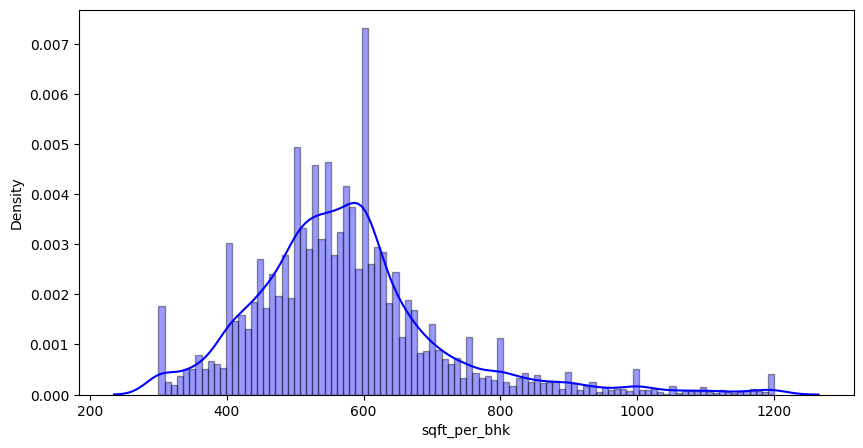

In [52]:
sns.distplot(housing_clean["sqft_per_bhk"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [53]:
housing_clean = housing_clean[~(housing_clean["sqft"] > 6000)]

<ipython-input-54-c808a931b1fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_clean["sqft"], hist=True, kde=True,


<Axes: xlabel='sqft', ylabel='Density'>

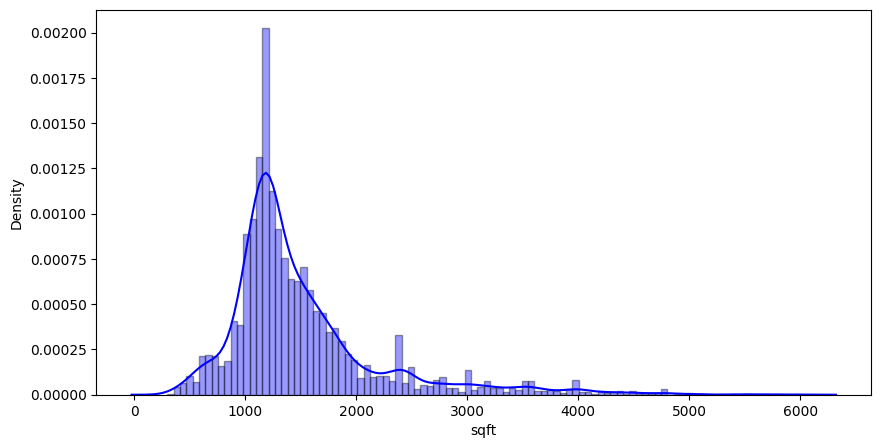

In [54]:
sns.distplot(housing_clean["sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-55-5754fce4e80f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_clean["price_per_sqft"], hist=True, kde=True,


<Axes: xlabel='price_per_sqft', ylabel='Density'>

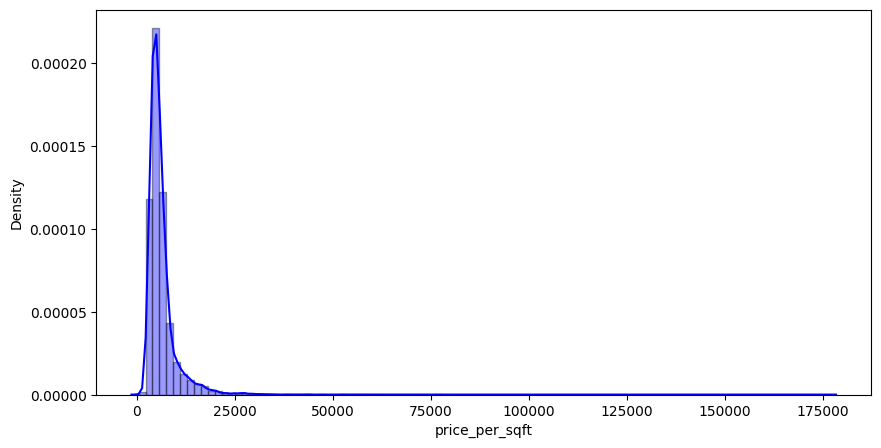

In [55]:
sns.distplot(housing_clean["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [56]:
housing_clean.sort_values(["price"], ascending=False)

area_type        availability                    location  \
12443            Plot  Area       Ready To Move                    Mundhawa   
6421             Plot  Area  Soon to be Vacated                    Swargate   
8398   Super built-up  Area       Ready To Move              Kondhwa Budruk   
9535             Plot  Area       Ready To Move                    Gultekdi   
1299             Plot  Area       Ready To Move                 Lulla Nagar   
...                     ...                 ...                         ...   
5410   Super built-up  Area       Ready To Move  Hadapsar Industrial Estate   
11091        Built-up  Area       Ready To Move                  Laxmi Road   
7482   Super built-up  Area       Ready To Move                 Viman Nagar   
12579  Super built-up  Area       Ready To Move                  Anandnagar   
8594         Built-up  Area       Ready To Move            Law College Road   

       bath  balcony   price  bhk    sqft  price_per_sqft  sqft_per_bhk  
12443     8        4  2600.0    4  4350.0    59770.114943        1087.5  
6421      3        2  2250.0    4  2940.0    76530.612245         735.0  
8398      4        5  1400.0    5  2500.0    56000.000000         500.0  
9535      5        4  1250.0    4  2400.0    52083.333333         600.0  
1299      7        1  1200.0    9  4050.0    29629.629630         450.0  
...     ...      ...     ...  ...     ...             ...           ...  
5410      1        1    10.0    1   400.0     2500.000000         400.0  
11091     1        1    10.0    1   410.0     2439.024390         410.0  
7482      2        1    10.0    1   470.0     2127.659574         470.0  
12579     1        1    10.0    1   410.0     2439.024390         410.0  
8594      1        1     9.0    1   450.0     2000.000000         450.0  

[12339 rows x 10 columns]

In [57]:
housing_clean = housing_clean[~(housing_clean["price_per_sqft"] > 20000)]

<ipython-input-58-5754fce4e80f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_clean["price_per_sqft"], hist=True, kde=True,


<Axes: xlabel='price_per_sqft', ylabel='Density'>

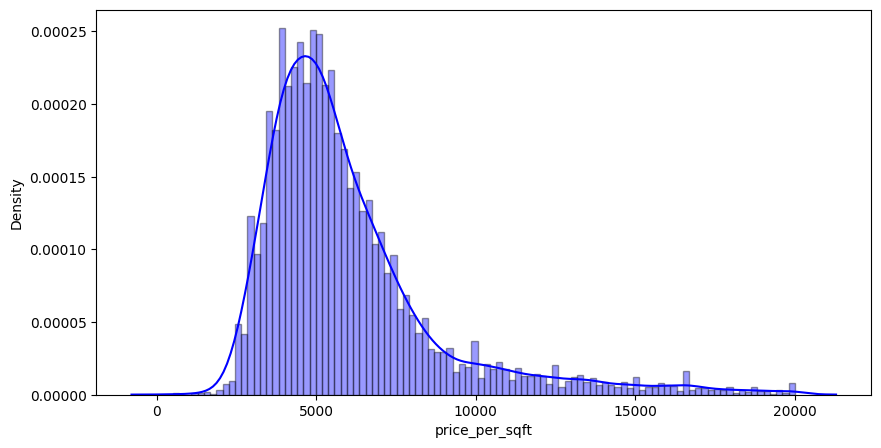

In [58]:
sns.distplot(housing_clean["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-59-84a71bcb03b7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_clean["price"], hist=True, kde=True,


<Axes: xlabel='price', ylabel='Density'>

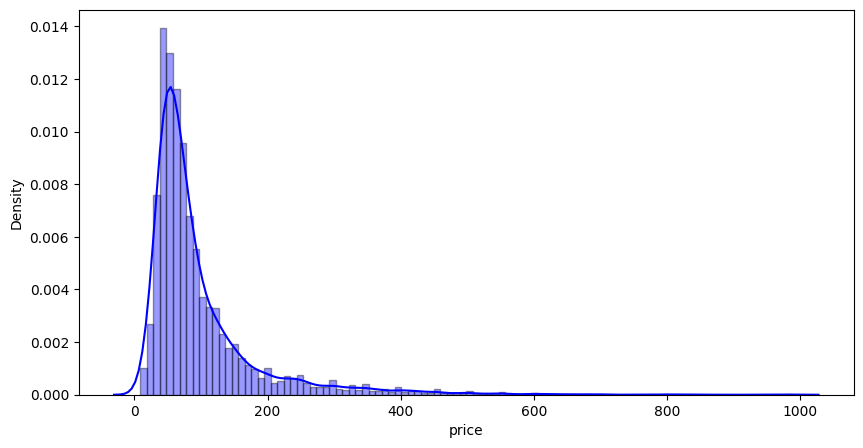

In [59]:
sns.distplot(housing_clean["price"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [60]:
housing_clean.shape

(12210, 10)

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [62]:
housing_clean = remove_bhk_outliers(housing_clean)

In [63]:
housing_clean = housing_clean[housing_clean.bath < housing_clean.bhk+2]
housing_clean.shape

(7764, 10)

##### Dropping feature based on correlation

In [64]:
housing_clean.corr()["price"].sort_values(ascending=False)

<ipython-input-64-6c6260cb30cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_clean.corr()["price"].sort_values(ascending=False)


price             1.000000
sqft              0.824240
price_per_sqft    0.774631
bath              0.638549
bhk               0.626027
sqft_per_bhk      0.469561
balcony           0.302025
Name: price, dtype: float64

In [65]:
housing_clean.drop(["price_per_sqft", "sqft_per_bhk", "balcony"], axis = 1, inplace = True)

In [66]:
price = housing_clean["price"]
housing_clean.drop(["price"], axis = 1, inplace = True)

In [67]:
housing_clean = housing_clean[["sqft", "bhk", "bath", "availability", "area_type", "location"]]

##### Handling Categorical Features

In [68]:
le1 = LabelEncoder()
housing_availability = le1.fit_transform(housing_clean.iloc[:,3])

In [69]:
le2 = LabelEncoder()
housing_area_type = le2.fit_transform(housing_clean.iloc[:,4])

In [70]:
le3 = LabelEncoder()
housing_location = le3.fit_transform(housing_clean.iloc[:,5])

In [71]:
ohe1 = OneHotEncoder()
housing_availability = ohe1.fit_transform(housing_availability.reshape(-1,1))
housing_availability = pd.DataFrame(housing_availability.toarray(), columns=le1.classes_)

In [72]:
ohe2 = OneHotEncoder()
housing_area_type = ohe2.fit_transform(housing_area_type.reshape(-1,1))
housing_area_type = pd.DataFrame(housing_area_type.toarray(), columns=le2.classes_)

In [73]:
ohe3 = OneHotEncoder()
housing_location = ohe3.fit_transform(housing_location.reshape(-1,1))
housing_location = pd.DataFrame(housing_location.toarray(), columns=le3.classes_)

#### Preparing data for Model

In [74]:
housing_availability.drop([housing_availability.columns[len(housing_availability.columns)-1]], axis=1, inplace = True)
housing_area_type.drop([housing_area_type.columns[len(housing_area_type.columns)-1]], axis=1, inplace = True)
housing_location.drop([housing_location.columns[len(housing_location.columns)-1]], axis=1, inplace = True)

In [75]:
housing_num_features = housing_clean.iloc[:, 0:3].reset_index()
housing_num_features.drop(["index"], axis = 1, inplace = True)

In [76]:
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(housing_num_features), columns=housing_num_features.columns)

In [77]:
housing_for_model = pd.concat([housing_num_scaled_features, housing_availability, housing_area_type, housing_location], axis=1)

In [78]:
housing_for_model

sqft       bhk      bath  Ready To Move  Built-up  Area  \
0    -0.633362 -0.576094 -0.505975            0.0             0.0   
1     0.000416  0.401780  0.434506            1.0             0.0   
2    -0.477984 -0.576094 -0.505975            1.0             0.0   
3     1.650964  1.379654  1.374987            0.0             0.0   
4     2.425127  1.379654  1.374987            1.0             0.0   
...        ...       ...       ...            ...             ...   
7759  2.633661  2.357528  1.374987            1.0             1.0   
7760  2.834016  1.379654  2.315469            1.0             0.0   
7761 -0.517510 -0.576094 -0.505975            1.0             1.0   
7762  4.318283  1.379654  1.374987            0.0             0.0   
7763 -1.323021 -1.553968 -1.446456            1.0             0.0   

      Carpet  Area  Plot  Area  Alandi Road  Ambegaon Budruk  Anandnagar  \
0              0.0         0.0          1.0              0.0         0.0   
1              0.0         0.0          0.0              0.0         0.0   
2              0.0         0.0          0.0              0.0         0.0   
3              0.0         0.0          0.0              0.0         0.0   
4              0.0         0.0          0.0              0.0         0.0   
...            ...         ...          ...              ...         ...   
7759           0.0         0.0          0.0              0.0         0.0   
7760           0.0         0.0          0.0              0.0         0.0   
7761           0.0         0.0          0.0              0.0         0.0   
7762           0.0         0.0          0.0              0.0         0.0   
7763           0.0         0.0          0.0              0.0         0.0   

      Aundh  Aundh Road  Balaji Nagar  Baner  Baner road  Bhandarkar Road  \
0       0.0         0.0           0.0    0.0         0.0              0.0   
1       1.0         0.0           0.0    0.0         0.0              0.0   
2       0.0         0.0           1.0    0.0         0.0              0.0   
3       0.0         0.0           0.0    1.0         0.0              0.0   
4       0.0         0.0           0.0    0.0         1.0              0.0   
...     ...         ...           ...    ...         ...              ...   
7759    0.0         0.0           0.0    0.0         0.0              0.0   
7760    0.0         0.0           0.0    0.0         0.0              0.0   
7761    0.0         0.0           0.0    0.0         0.0              0.0   
7762    0.0         0.0           0.0    0.0         0.0              0.0   
7763    0.0         0.0           0.0    0.0         0.0              0.0   

      Bhavani Peth  Bibvewadi  Bopodi  Budhwar Peth  Bund Garden Road  Camp  \
0              0.0        0.0     0.0           0.0               0.0   0.0   
1              0.0        0.0     0.0           0.0               0.0   0.0   
2              0.0        0.0     0.0           0.0               0.0   0.0   
3              0.0        0.0     0.0           0.0               0.0   0.0   
4              0.0        0.0     0.0           0.0               0.0   0.0   
...            ...        ...     ...           ...               ...   ...   
7759           0.0        0.0     0.0           0.0               0.0   0.0   
7760           0.0        0.0     0.0           0.0               0.0   0.0   
7761           0.0        0.0     0.0           0.0               0.0   0.0   
7762           0.0        0.0     0.0           0.0               0.0   0.0   
7763           0.0        0.0     0.0           0.0               0.0   0.0   

      Chandan Nagar  Dapodi  Deccan Gymkhana  Dehu Road  Dhankawadi  \
0               0.0     0.0              0.0        0.0         0.0   
1               0.0     0.0              0.0        0.0         0.0   
2               0.0     0.0              0.0        0.0         0.0   
3               0.0     0.0              0.0        0.0         0.0   
4               0.0     0.0            

In [79]:
X, y = housing_for_model.values, price.values
X_train, X_test, y_train, y_test = train_test_split(housing_for_model, price, test_size = 0.2, random_state = 42)

#### Comparing Model Results

In [80]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

-2.5889258605762608e+22

In [82]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.718404731174352

In [83]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.7236469240901409

In [84]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.6515048094674846

In [85]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.7580973668469135

In [86]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_train, y_train)
ab_reg.score(X_test, y_test)

0.6697185072442169

In [87]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

0.6394217674096736

In [88]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

0.7493510967840276

In [89]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 500], 'max_depth': [2, 4, 6, 8], 
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300], 
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

#find_best_model_using_gridsearchcv(X, y)

In [90]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X, y)
xgb_reg.score(X, y)

0.9226849985144295

In [91]:
import pickle
import json

In [93]:
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(xgb_reg,f)

In [94]:
cat_feature_columns = {
    'availability_columns' : [col for col in le1.classes_], 
    'area_columns' : [col for col in le2.classes_],
    'location_columns' : [col for col in le3.classes_]
}

with open("columns.json","w") as f:
    f.write(json.dumps(cat_feature_columns))